# Clustering

```
Clustering is the task of dividing the population or data points into a number of groups such that data points in the same groups are more similar to other data points in the same group than those in other groups. In simple words, the aim is to segregate groups with similar traits and assign them into clusters
```

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import numpy as np
%matplotlib inline

ref:
https://datascience.stackexchange.com/questions/48693/perform-k-means-clustering-over-multiple-columns
https://www.mikulskibartosz.name/pca-how-to-choose-the-number-of-components/

## KMean SetUp&Test

Kmeans algorithm provides better initial seeding in order to find the best clusters.

ref: https://towardsdatascience.com/an-introduction-to-clustering-algorithms-in-python-123438574097

[[-1.92101646  5.21673484]
 [ 0.05161133 -5.35489826]
 [-5.56465793 -2.34988939]
 [-2.40167949 10.17352695]]


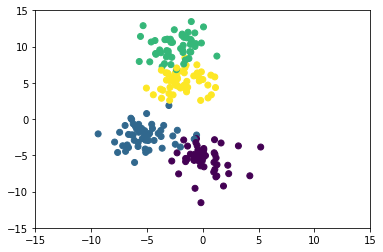

In [3]:
# create kmeans object

# import statements
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt# create blobs
data = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.6, random_state=50)# create np array for data points
points = data[0]# create scatter plot
plt.scatter(data[0][:,0], data[0][:,1], c=data[1], cmap='viridis')
plt.xlim(-15,15)
plt.ylim(-15,15)

kmeans = KMeans(n_clusters=4)# fit kmeans object to data
kmeans.fit(points)# print location of clusters learned by kmeans object
print(kmeans.cluster_centers_)# save new clusters for chart
y_km = kmeans.fit_predict(points)

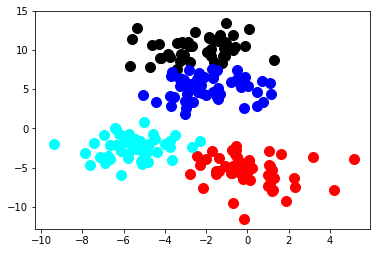

In [4]:
plt.scatter(points[y_km ==0,0], points[y_km == 0,1], s=100, c='red')
plt.scatter(points[y_km ==1,0], points[y_km == 1,1], s=100, c='black')
plt.scatter(points[y_km ==2,0], points[y_km == 2,1], s=100, c='blue')
plt.scatter(points[y_km ==3,0], points[y_km == 3,1], s=100, c='cyan')

## KMean


K-mean is one of the unsupervised algorithms, meaning that uses only input vectors, without knowlodge of the outcomes. AndreyBu [https://www.education-ecosystem.com/andreybu/REaxr-machine-learning-model-python-sklearn-kera/oPGdP-machine-learning-model-python-sklearn-kera/] puts as 

“the objective of K-means is simple: group similar data points together and discover underlying patterns. To achieve this objective, K-means looks for a fixed number (k) of clusters in a dataset.”

K would then mean the number of possible centres of clusters.

### How the K-means algorithm works

To process the learning data, the K-means algorithm in data mining starts with a first group of randomly selected centroids, which are used as the beginning points for every cluster, and then performs iterative (repetitive) calculations to optimize the positions of the centroids

It halts creating and optimizing clusters when either:

    The centroids have stabilized — there is no change in their values because the clustering has been successful.
    The defined number of iterations has been achieved.

Transforming data in categorical


In [5]:
df_original = pd.read_csv('data/treated_data/TerrestrialReport_lc_ld_mammals.txt',sep="|", dtype='unicode')
df = pd.read_csv('data/treated_data/TerrestrialReport_lc_ld_mammals.txt',sep="|", dtype='unicode')

for col_name in df.columns:
    if(df[col_name].dtype == 'object'):
        df[col_name] = df[col_name].astype('category')
        df[col_name] = df[col_name].cat.codes

The value of k reflects the 10 important Endpoints in the dataset

In [6]:
from sklearn.cluster import KMeans

Kmean = KMeans(n_clusters=10)
Kmean.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [7]:
Kmean.cluster_centers_

array([[ 2.56907801e+02,  2.11751773e+02,  3.39716312e+00,
        -8.36879433e-01,  9.02695035e+01, -1.00000000e+00,
         5.99290780e+00, -1.00000000e+00,  5.99290780e+00,
         3.75886525e-01,  3.00000000e+01,  2.28297872e+01,
         6.05673759e+00, -9.43262411e-01,  2.78794326e+01,
        -1.00000000e+00,  2.34964539e+01, -1.00000000e+00,
         2.92340426e+01,  4.65248227e+00,  2.04964539e+00,
         1.85815603e+00,  9.53191489e+00,  1.93758865e+01,
         9.43262411e+00,  2.00000000e+00,  2.00000000e+00,
         1.87234043e+00,  2.45390071e+00,  6.02836879e-01,
        -1.00000000e+00,  1.81943262e+02, -1.00000000e+00,
         8.02269504e+01, -1.00000000e+00,  1.51262411e+02,
         1.79503546e+01, -1.00000000e+00, -1.00000000e+00,
        -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
        -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
        -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
        -1.00000000e+00, -1.00000000e+00, -1.00000000e+0

Now there's the labels will show the clusters distribution

In [8]:
Kmean.labels_

array([5, 3, 6, ..., 2, 1, 1], dtype=int32)

In [9]:
features = list(df.columns)
data = df[features]
clustering_kmeans = KMeans(n_clusters=10, precompute_distances="auto", n_jobs=-1)
data['clusters'] = clustering_kmeans.fit_predict(data)

data[:10]

,CAS Number,Chemical Name,Chemical Grade,Chemical Purity Mean Op,Chemical Purity Mean(%),Chemical Purity Min Op,Chemical Purity Min(%),Chemical Purity Max Op,Chemical Purity Max(%),Species Group,...,Observed Duration Max Op (Days),Observed Duration Max (Days),Observed Duration Units (Days),Author,Reference Number,Title,Source,Publication Year,Unnamed: 65,clusters
0,278,297,6,-1,85,-1,6,-1,6,0,...,-1,10,0,257,33,181,131,25,-1,6
1,278,297,6,-1,85,-1,6,-1,6,0,...,-1,10,0,257,33,181,131,25,-1,5
2,278,297,6,-1,85,-1,6,-1,6,0,...,-1,10,0,257,33,181,131,25,-1,9
3,278,297,6,-1,85,-1,6,-1,6,0,...,-1,10,0,257,33,181,131,25,-1,6
4,278,297,6,-1,85,-1,6,-1,6,0,...,-1,10,0,257,33,181,131,25,-1,0
5,278,297,6,-1,85,-1,6,-1,6,0,...,-1,10,0,257,33,181,131,25,-1,6
6,280,37,3,-1,112,-1,6,-1,6,0,...,-1,10,0,1,110,254,270,17,-1,4
7,280,37,3,-1,112,-1,6,-1,6,0,...,-1,10,0,1,110,254,270,17,-1,9
8,280,37,3,-1,112,-1,6,-1,6,0,...,-1,10,0,1,110,254,270,17,-1,4
9,281,133,3,-1,112,-1,6,-1,6,0,...,-1,10,0,82,268,209,209,18,-1,7


Fist, to generate the plot with multiple columns, we have to get the PCA (Principal component analysis) to reduce the data in a 2 dimension dataset.


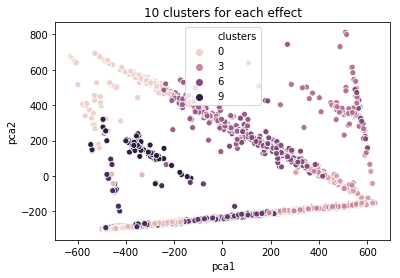

In [12]:
reduced_data = PCA(n_components = 2).fit_transform(data)

results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=data['clusters'], data=results)
plt.title('10 clusters for each effect')
plt.show()